# **ANALYZE THE DATASET**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Wind energy Dataset.csv to Wind energy Dataset.csv


In [3]:
data=pd.read_csv("Wind energy Dataset.csv")
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [4]:
pwd

'/content'

In [5]:
data

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [6]:
data.rename(columns={"Date/Time":"Time",
                     "LV ActivePower (kW)":"ActivePower(kW)",
                     "Wind Speed (m/s)":"WindSpeed(m/s)",
                     "Theoretical_Power_Curve (KWh)":"TheoreticalPowerCurve(KWh)",
                     "Wind Direction (°)":"WindDirection"})

,Time,ActivePower(kW),WindSpeed(m/s),TheoreticalPowerCurve(KWh),WindDirection
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


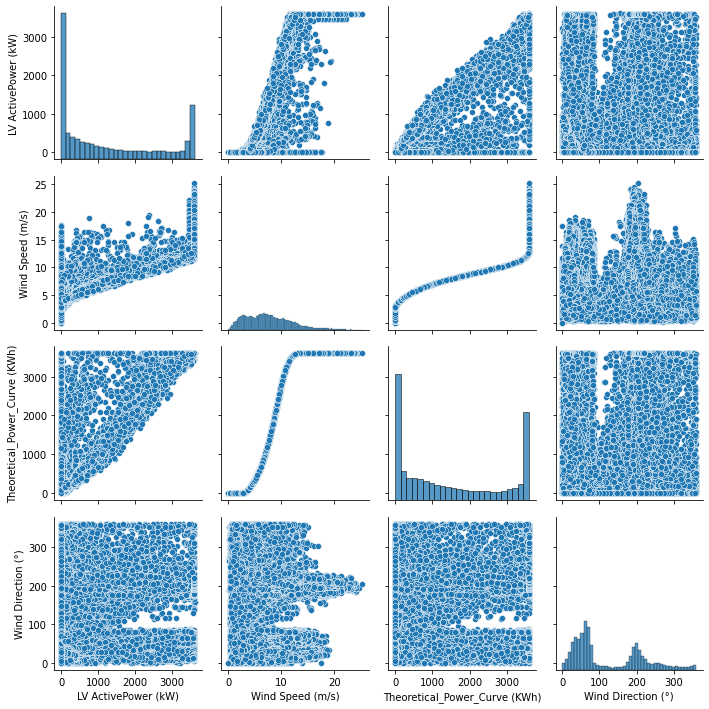

In [7]:
sns.pairplot(data)

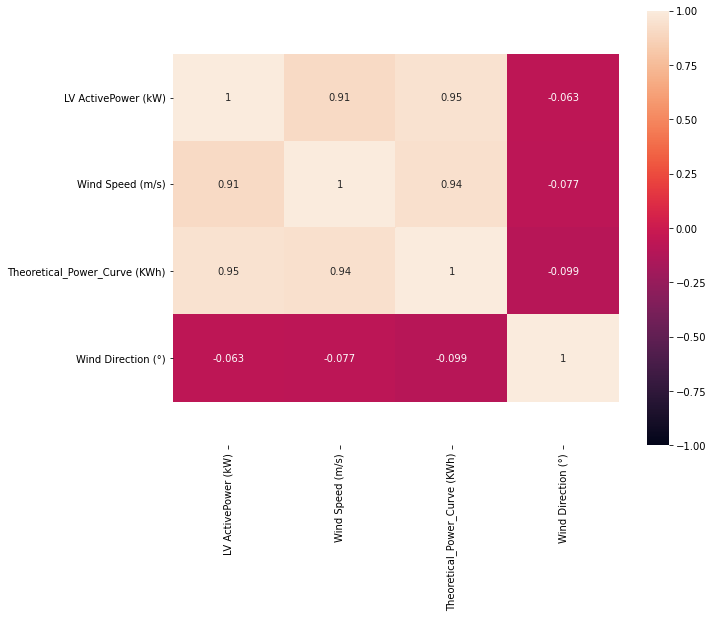

In [8]:
plt.figure(figsize=(10,8))
corr=data.corr()
ax=sns.heatmap(corr,vmin=-1,vmax=1,annot= True)
bottom, top= ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

The above heat map clearly tells us that there is no relation between wind direction and the power generated. But Wind speed, Theoretical power and actual power generated have a large positive correlation.

In [9]:
data["Date/Time"]= pd.to_datetime(data["Date/Time"],format="%d %m %Y %H:%M",errors="coerce")

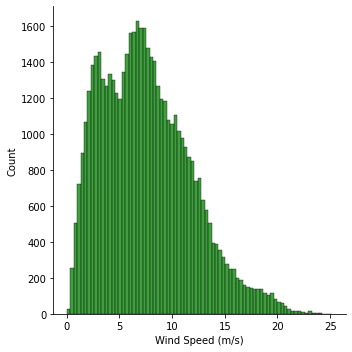

In [10]:
sns.displot(data["Wind Speed (m/s)"], color='green')

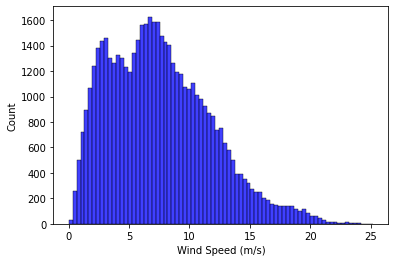

In [11]:
sns.histplot(data["Wind Speed (m/s)"],color='blue')